<a href="https://colab.research.google.com/github/SmykovskaAnna/INN.Lab2/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання 1

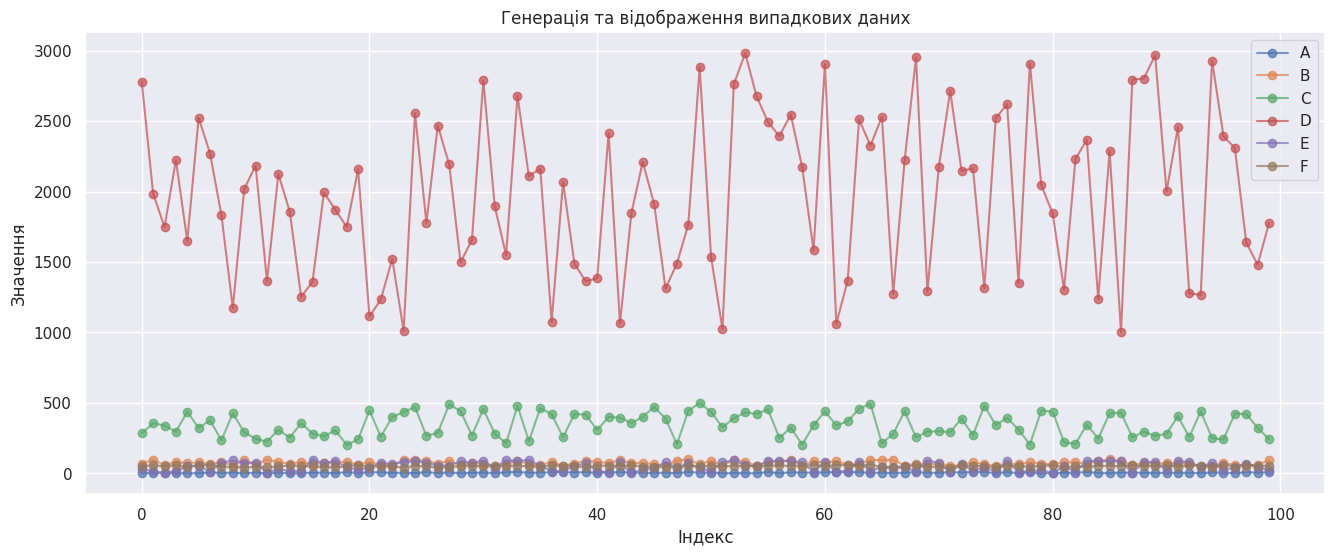

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

# Кількість точок
n = 100

# Генерація даних з різними проміжками
data = {
    'A': np.random.randint(0, 10, n),
    'B': np.random.randint(50, 100, n),
    'C': np.random.randint(200, 500, n),
    'D': np.random.randint(1000, 3000, n),
    'E': np.random.uniform(0, 1, n) * 100, # плаваючі значення
    'F': np.random.normal(50, 5, n) # нормально розподілені
}

# Конвертація в DataFrame
df = pd.DataFrame(data)

plt.figure(figsize=(16, 6))
for column in df.columns:
    plt.plot(df[column], marker='o', alpha=0.7, label=column)

plt.legend()
plt.title("Генерація та відображення випадкових даних")
plt.xlabel("Індекс")
plt.ylabel("Значення")
plt.show()

# Завдання 2

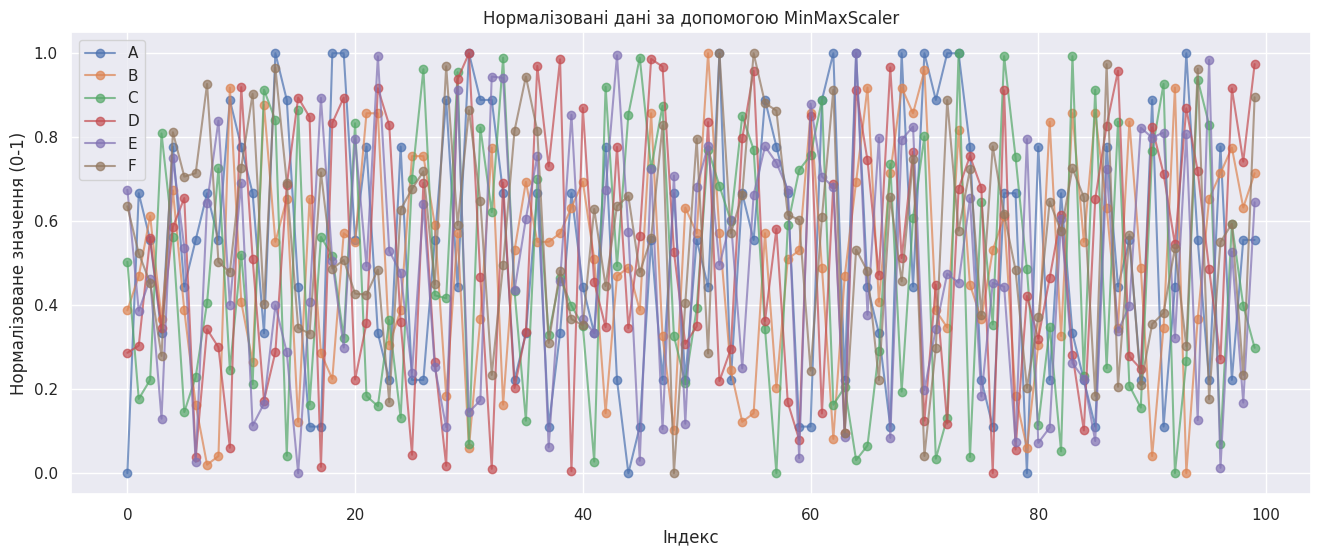

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Ініціалізація MinMaxScaler
scaler = MinMaxScaler()

# Нормалізація даних
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Побудова графіка
plt.figure(figsize=(16, 6))
for column in df_normalized.columns:
    plt.plot(df_normalized[column], marker='o', alpha=0.7, label=column)

plt.legend()
plt.title("Нормалізовані дані за допомогою MinMaxScaler")
plt.xlabel("Індекс")
plt.ylabel("Нормалізоване значення (0-1)")
plt.show()

# Завдання 3

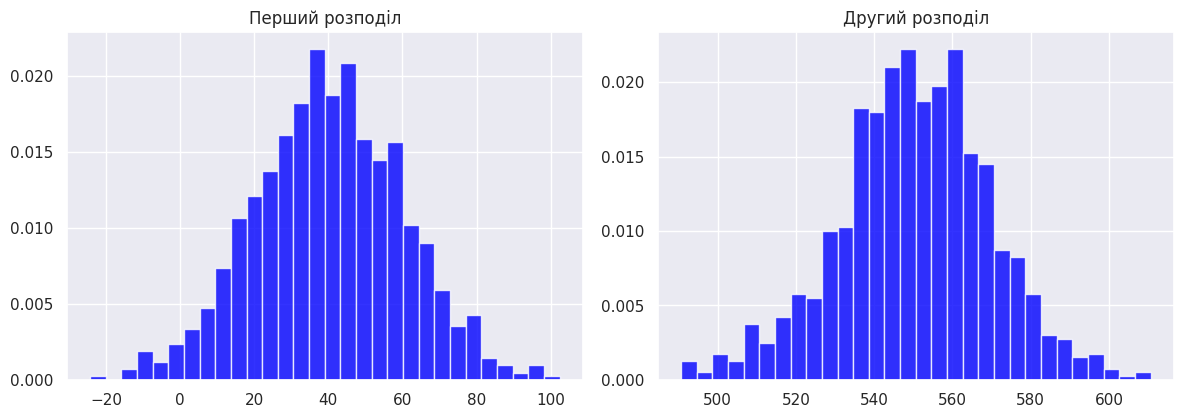

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Перший розподіл
dist1 = np.random.normal(loc=40, scale=20, size=1000)

# Другий розподіл
dist2 = np.random.normal(loc=550, scale=20, size=1000)

# Візуалізація
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(dist1, bins=30, density=True, alpha=0.8, color='blue')
plt.title("Перший розподіл")

plt.subplot(2, 2, 2)
plt.hist(dist2, bins=30, density=True, alpha=0.8, color='blue')
plt.title("Другий розподіл")

plt.tight_layout()
plt.show()

# Завдання 4

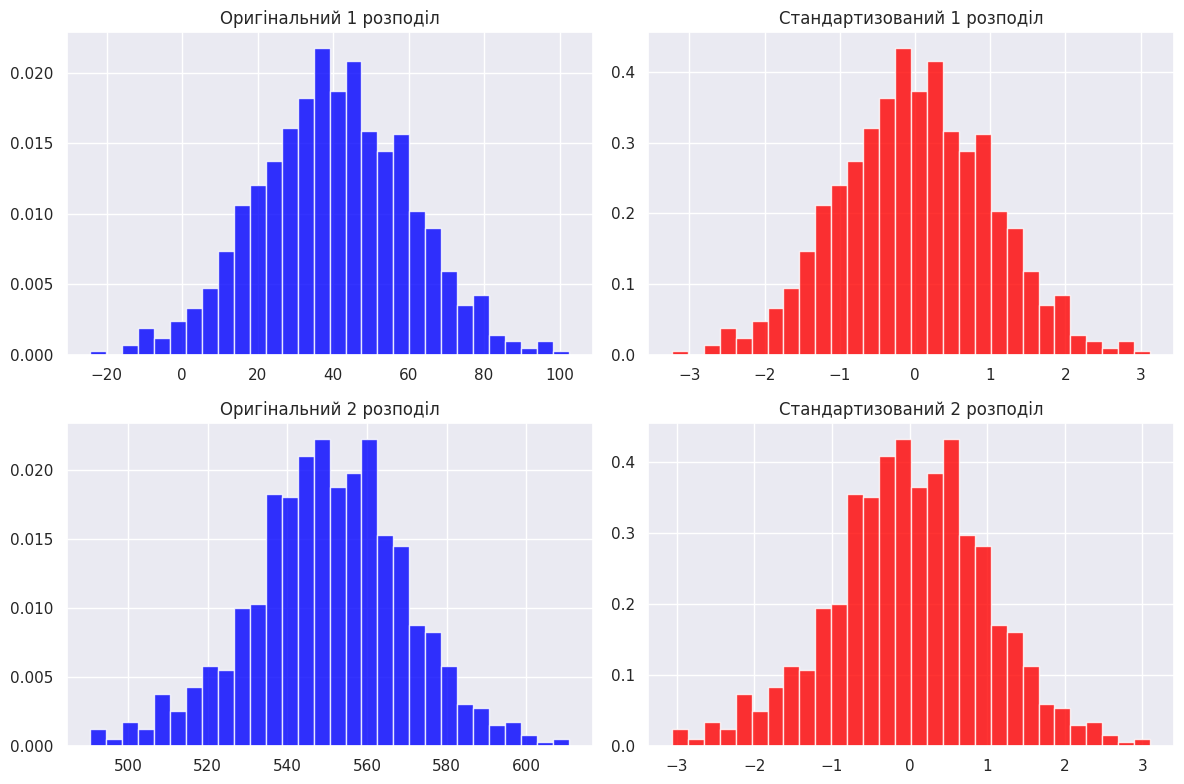

In [ ]:
from sklearn.preprocessing import StandardScaler

# Стандартизація
scaler = StandardScaler()
dist1_scaled = scaler.fit_transform(dist1.reshape(-1, 1)).flatten()
dist2_scaled = scaler.fit_transform(dist2.reshape(-1, 1)).flatten()

# Візуалізація
plt.figure(figsize=(12, 8))

# Оригінальний перший розподіл
plt.subplot(2, 2, 1)
plt.hist(dist1, bins=30, density=True, alpha=0.8, color='blue')
plt.title("Оригінальний 1 розподіл")

# Стандартизований перший розподіл
plt.subplot(2, 2, 2)
plt.hist(dist1_scaled, bins=30, density=True, alpha=0.8, color='red')
plt.title("Стандартизований 1 розподіл")

# Оригінальний другий розподіл
plt.subplot(2, 2, 3)
plt.hist(dist2, bins=30, density=True, alpha=0.8, color='blue')
plt.title("Оригінальний 2 розподіл")

# Стандартизований другий розподіл
plt.subplot(2, 2, 4)
plt.hist(dist2_scaled, bins=30, density=True, alpha=0.8, color='red')
plt.title("Стандартизований 2 розподіл")

plt.tight_layout()
plt.show()

# Завдання 5

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv("alarms_no_scalse.csv")

X = df[['sound', 'distance', 'visibility']]
y = df['alarm']

# Поділ на тренувальні та тестові дані
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Створення і тренування моделі
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse_original = mean_squared_error(y_test, y_pred)
print("MSE:", mse_original)

MSE: 0.022583188254720193


# Завдання 6

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Нормалізація ознак
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Поділ нормалізованих даних на train/test
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Створення і тренування моделі на нормалізованих даних
model_scaled = LinearRegression()
model_scaled.fit(X_train_s, y_train_s)

y_pred_s = model_scaled.predict(X_test_s)
mse_scaled = mean_squared_error(y_test_s, y_pred_s)
print("MSE:", mse_scaled)

MSE: 0.022583188254717203


# Інший варіант виконання завдання 5 і 6

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf

df = pd.read_csv('alarms_no_scalse.csv')

X = df[['sound', 'distance', 'visibility']].values
y = df['alarm'].astype(float).values

# Завдання 5 — Модель на оригінальних даних

# Розділення на тренувальні та тестові дані
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Побудова моделі для оригінальних даних
model_raw = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1)
])

model_raw.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Навчання моделі
model_raw.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))

loss_raw, mae_raw = model_raw.evaluate(X_test, y_test)
print("=== Оригінальні дані ===")
print("MSE (через evaluate):", loss_raw)
print("MAE:", mae_raw)


# Завдання 6 — Модель на нормалізованих даних

# Нормалізація ознак
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Поділ на тренувальні та тестові дані
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Побудова моделі для нормалізованих даних
model_scaled = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train_s.shape[1],)),
    tf.keras.layers.Dense(1)
])

model_scaled.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Навчання моделі
model_scaled.fit(X_train_s, y_train_s, epochs=50, batch_size=8, validation_data=(X_test_s, y_test_s))

loss_scaled, mae_scaled = model_scaled.evaluate(X_test_s, y_test_s)
print("=== Нормалізовані дані ===")
print("MSE (через evaluate):", loss_scaled)
print("MAE:", mae_scaled)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2968840960.0000 - mae: 45004.0586 - val_loss: 59810564.0000 - val_mae: 6703.2676
Epoch 2/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 22142434.0000 - mae: 3434.7886 - val_loss: 2857.8630 - val_mae: 45.3815
Epoch 3/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 740.8034 - mae: 17.6735 - val_loss: 6.2387 - val_mae: 2.0604
Epoch 4/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.9767 - mae: 2.0335 - val_loss: 6.2332 - val_mae: 2.0599
Epoch 5/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.0388 - mae: 2.0504 - val_loss: 6.2368 - val_mae: 2.0593
Epoch 6/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.1068 - mae: 2.0755 - val_loss: 6.2161 - val_mae: 2.0594
Epoch 7/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.9336 - mae: 2.0383 - val_loss: 6.2384 - val_mae: 2.0581
Epoch 8/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.0311 - mae: 2.0482 - val_loss: 6.2464 - val_mae: 2.0575
Epoch 9/50
300/300 ━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0763 - mae: 0.2189 - val_loss: 0.0229 - val_mae: 0.1267
Epoch 2/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0211 - mae: 0.1212 - val_loss: 0.0224 - val_mae: 0.1255
Epoch 3/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0206 - mae: 0.1207 - val_loss: 0.0222 - val_mae: 0.1250
Epoch 4/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0216 - mae: 0.1235 - val_loss: 0.0221 - val_mae: 0.1247
Epoch 5/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0211 - mae: 0.1223 - val_loss: 0.0223 - val_mae: 0.1250
Epoch 6/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0198 - mae: 0.1180 - val_loss: 0.0226 - val_mae: 0.1256
Epoch 7/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0209 - mae: 0.1222 - val_loss: 0.0222 - val_mae: 0.1247
Epoch 8/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0209 - mae: 0.1209 - val_loss: 0.0219 - val_mae: 0.1242
Epoch 9/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0213 